In [28]:
import random
import numpy as np
import torch
from skimage import data

im = data.astronaut()
im = np.swapaxes(np.swapaxes(im, 0, 2), 1, 2)
im = torch.from_numpy(im)
nbin = random.randint(32,128)

In [29]:
import matplotlib.pyplot as plt

In [70]:
def quantize(tensor, nbin):
    return torch.div(tensor * nbin, 256, rounding_mode='floor')

In [71]:
histogram_r = torch.histc(quantize(im[0].float(), nbin), bins=nbin)
histogram_g = torch.histc(quantize(im[1].float(), nbin), bins=nbin)
histogram_b = torch.histc(quantize(im[2].float(), nbin), bins=nbin)
histogram_r.shape

torch.Size([106])

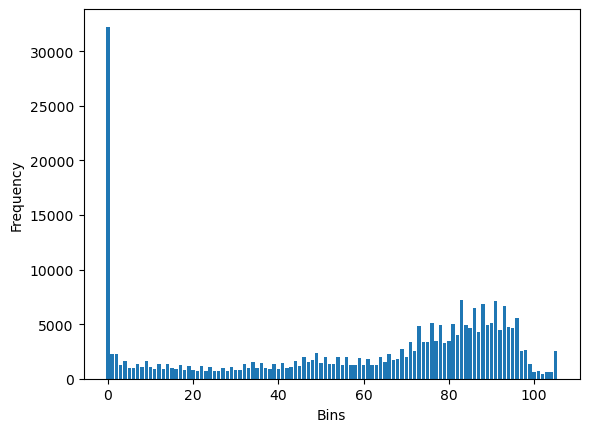

In [31]:
x = range(nbin)
plt.bar(x, histogram_r, align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [32]:
C,H,W = im.shape
tot_pixels = H*W*C

In [72]:
p_r = histogram_r / tot_pixels
p_g = histogram_g / tot_pixels
p_b = histogram_b / tot_pixels

In [73]:
out = torch.cat((p_r, p_g, p_b))
out /= out.sum()

In [74]:
out.shape

torch.Size([318])

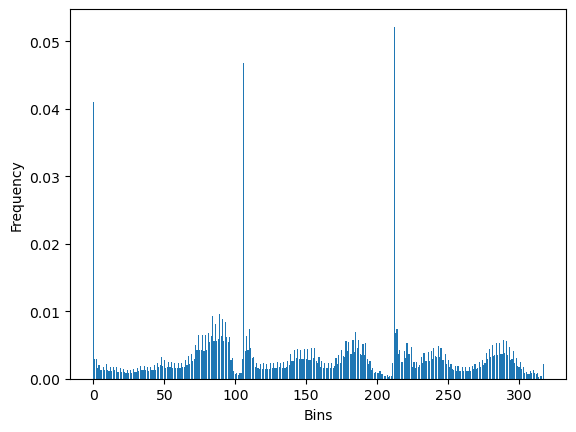

In [75]:
x = range(3*nbin)
plt.bar(x, out, align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()